In [143]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from itertools import combinations
from collections import Counter

### Merging the files(12) into one file


In [43]:
files = [file for file in os.listdir('/home/ezequiel/Documents/Datasets portfolio/Sales_data')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("/home/ezequiel/Documents/Datasets portfolio/Sales_data/"+file)
    all_data = pd.concat([all_data, df])
    
all_data.to_csv('all_data.csv', index=False)


### Reading the dataset

In [44]:
data = pd.read_csv("/home/ezequiel/Documents/Datasets portfolio/all_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


### Cleaning the data

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [46]:
data.isna().count()

Order ID            186850
Product             186850
Quantity Ordered    186850
Price Each          186850
Order Date          186850
Purchase Address    186850
dtype: int64

In [47]:
nan_df = data[data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
58,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN
522,NaN,NaN,NaN,NaN,NaN,NaN
839,NaN,NaN,NaN,NaN,NaN,NaN
1590,NaN,NaN,NaN,NaN,NaN,NaN


Drop the records that contain NaN in all of it's columns

In [48]:
data = data.dropna(how='all')

We want to know the quantity of sales by month, in which month we have more sales? How much money this sales represent?

### Splitting the Order date column

#### ValueError: could not convert string to float: 'Or' --- We cant convert directly because of this error, to move ahead we firt need to solve this issue

In [49]:
or_df = data[data['Order Date'].str[0:2] == 'Or']
or_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
964,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
973,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
975,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1318,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1355,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2945,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3043,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3936,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4466,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5074,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [50]:
or_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 964 to 186448
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          355 non-null    object
 1   Product           355 non-null    object
 2   Quantity Ordered  355 non-null    object
 3   Price Each        355 non-null    object
 4   Order Date        355 non-null    object
 5   Purchase Address  355 non-null    object
dtypes: object(6)
memory usage: 19.4+ KB


#### Modifying the data so we can get rid of the values containing Or in the Order Date column

In [59]:
data = data[data['Order Date'].str[0:2] != 'Or']
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
5,194100,iPhone,1,700.0,05/10/19 19:44,"81 Jefferson St, San Francisco, CA 94016"
6,194101,USB-C Charging Cable,1,11.95,05/11/19 22:44,"354 Meadow St, Boston, MA 02215"
7,194102,Lightning Charging Cable,1,14.95,05/07/19 12:49,"166 4th St, Dallas, TX 75001"
8,194103,27in FHD Monitor,1,149.99,05/24/19 18:28,"759 Pine St, Seattle, WA 98101"
9,194104,Wired Headphones,1,11.99,05/04/19 18:38,"330 1st St, Seattle, WA 98101"


Casting the month type from str to int

In [60]:
data['Month'] = data['Order Date'].str[0:2]
data['Month'] = data['Month'].astype('int')
data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


#### We want to know the quantity of sales by month, in which month we have more sales? How much money this sales represent?
Okey, we already have our month column, but we still need the amount of each sale, looking at the dataset, we can see that we have a Quantity Ordered column and a Price Each column, so, in order to get the total amount of the sale we can create a new column with the product of that columns.

In [61]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.3+ MB


In [63]:
data['Sale Amount'] = data['Quantity Ordered'] * data['Price Each']
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Amount
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98
5,194100,iPhone,1,700.00,05/10/19 19:44,"81 Jefferson St, San Francisco, CA 94016",5,700.00
6,194101,USB-C Charging Cable,1,11.95,05/11/19 22:44,"354 Meadow St, Boston, MA 02215",5,11.95
7,194102,Lightning Charging Cable,1,14.95,05/07/19 12:49,"166 4th St, Dallas, TX 75001",5,14.95
8,194103,27in FHD Monitor,1,149.99,05/24/19 18:28,"759 Pine St, Seattle, WA 98101",5,149.99
9,194104,Wired Headphones,1,11.99,05/04/19 18:38,"330 1st St, Seattle, WA 98101",5,11.99


In [67]:
results = data.groupby('Month').sum()
results.head(10)

,Quantity Ordered,Price Each,Sale Amount
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


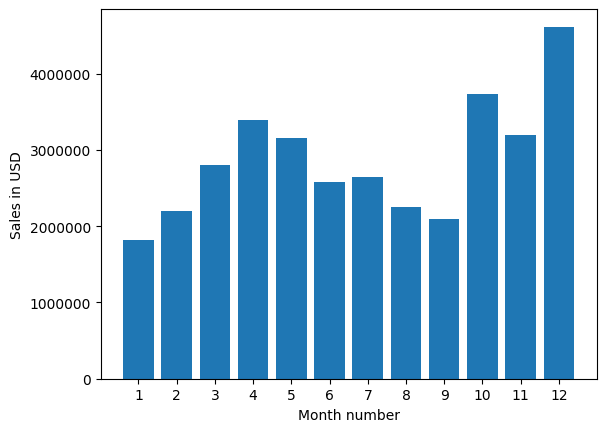

In [101]:
months = range(1,13)

plt.bar(months, results['Sale Amount'])
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show() 

#### Which city has the most sales?

In order to extract the city from the Purchase Address column, we can use the apply function 

In [76]:
data['City'] = data['Purchase Address'].apply(lambda x: x.split(',') [1])
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Amount,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,New York City
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,New York City
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,Seattle
5,194100,iPhone,1,700.00,05/10/19 19:44,"81 Jefferson St, San Francisco, CA 94016",5,700.00,San Francisco
6,194101,USB-C Charging Cable,1,11.95,05/11/19 22:44,"354 Meadow St, Boston, MA 02215",5,11.95,Boston
7,194102,Lightning Charging Cable,1,14.95,05/07/19 12:49,"166 4th St, Dallas, TX 75001",5,14.95,Dallas
8,194103,27in FHD Monitor,1,149.99,05/24/19 18:28,"759 Pine St, Seattle, WA 98101",5,149.99,Seattle
9,194104,Wired Headphones,1,11.99,05/04/19 18:38,"330 1st St, Seattle, WA 98101",5,11.99,Seattle


def get_city(address):
    return address.split(',')[1]

data['City'] = data['Purchase Address'].apply(lambda x: get_city(x))


In [87]:
#Using a function
def get_state(address):
    return address.split(',')[2][1:3]

def get_city(address):
    return address.split(',')[1]

data['City'] = data['Purchase Address'].apply(lambda x: get_city(x) +' '+ get_state(x))

In [89]:
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Amount,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,New York City NY
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas TX
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,New York City NY
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas TX
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,Seattle WA
5,194100,iPhone,1,700.00,05/10/19 19:44,"81 Jefferson St, San Francisco, CA 94016",5,700.00,San Francisco CA
6,194101,USB-C Charging Cable,1,11.95,05/11/19 22:44,"354 Meadow St, Boston, MA 02215",5,11.95,Boston MA
7,194102,Lightning Charging Cable,1,14.95,05/07/19 12:49,"166 4th St, Dallas, TX 75001",5,14.95,Dallas TX
8,194103,27in FHD Monitor,1,149.99,05/24/19 18:28,"759 Pine St, Seattle, WA 98101",5,149.99,Seattle WA
9,194104,Wired Headphones,1,11.99,05/04/19 18:38,"330 1st St, Seattle, WA 98101",5,11.99,Seattle WA


In [91]:
result_city = data.groupby('City').sum()
result_city.head()

,Quantity Ordered,Price Each,Month,Sale Amount
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80


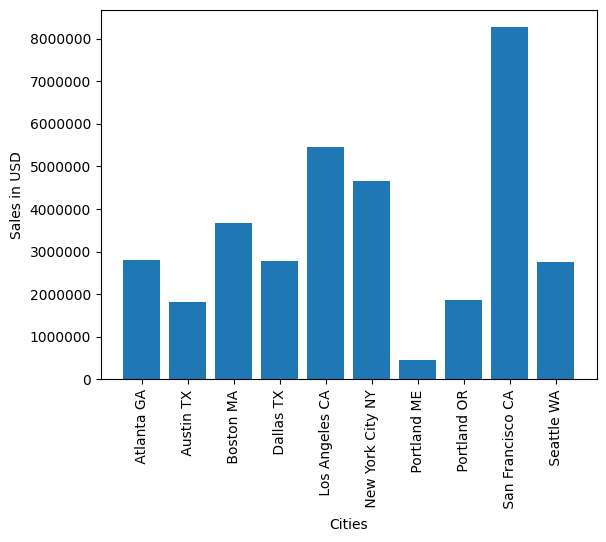

In [135]:
cities = [city for city,df in data.groupby('City')]


plt.bar(cities, result_city['Sale Amount'])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(cities, rotation=90, size=10)
plt.ylabel('Sales in USD')
plt.xlabel('Cities')
plt.show() 

#### In wich moment of the day we sell the most?

In [116]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sale Amount       185950 non-null  float64       
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 14.2+ MB


In [118]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Amount,City
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,New York City NY
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas TX
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,New York City NY
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas TX
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98,Seattle WA


In [119]:
data['Hour'] = data['Order Date'].dt.hour
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Amount,City,Hour
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,New York City NY,17
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas TX,14
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,New York City NY,11
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas TX,20
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98,Seattle WA,22


In [125]:
df_hours = data.groupby(['Hour']).count()
df_hours.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Amount,City
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


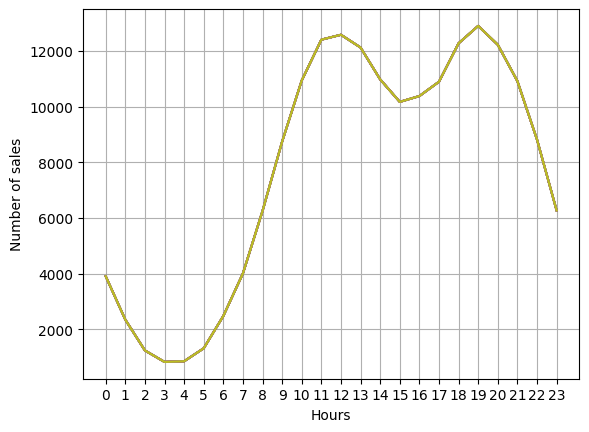

In [129]:
hours = [hour for hour, df in data.groupby('Hour')]

plt.plot(hours, data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of sales')
plt.show()


#### Most sold products

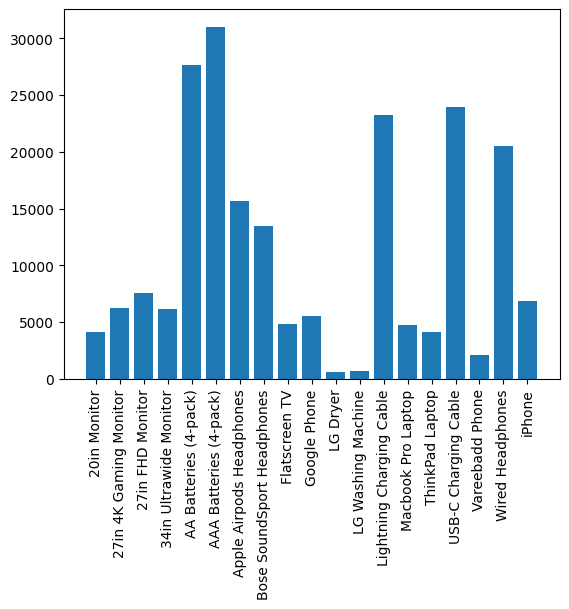

In [161]:
product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(rotation=90)
plt.show()

#### Products sold more often together top 10

In [141]:
df_oid = data[data['Order ID'].duplicated(keep=False)]
df_oid['Grouped'] = df_oid.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_oid = df_oid[['Order ID', 'Grouped']].drop_duplicates()

df_oid.head(10)

/tmp/ipykernel_37726/4282425206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oid['Grouped'] = df_oid.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
15,194110,"Google Phone,Wired Headphones"
77,194170,"Google Phone,USB-C Charging Cable"
82,194174,"iPhone,Lightning Charging Cable,Wired Headphones"
89,194179,"Flatscreen TV,AAA Batteries (4-pack)"
103,194192,"Wired Headphones,Bose SoundSport Headphones"
116,194203,"iPhone,Lightning Charging Cable"
119,194205,"iPhone,Wired Headphones"
168,194253,"iPhone,Lightning Charging Cable,Wired Headphon..."
212,194294,"Macbook Pro Laptop,Bose SoundSport Headphones"
233,194314,"Google Phone,USB-C Charging Cable,Wired Headph..."


In [147]:
count = Counter()

for row in df_oid['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
#print(count)
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Products, Quantities, and Prices

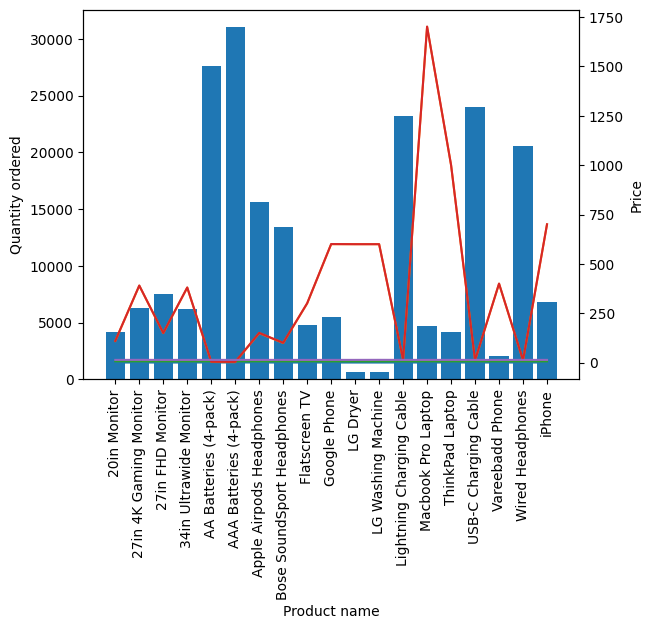

In [167]:
prices = data.groupby('Product').mean(['Prize each'])

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices)

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity ordered')
ax2.set_ylabel('Price')
#ax1.set_xticklabels(products, rotation=90)
ax1.tick_params(axis='x', labelrotation = 90)

plt.show()